<a href="https://colab.research.google.com/github/nikhilnigam11/Jamboree-Admission-Machine-Learning-Case-Study/blob/main/Jamboree_Admisssion_BCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case Study: Jamboree Admisssion**


------------------------------------------------

- **Nikhil Kumar Nigam**
- June 2024 beginer DSML Batch
- nikhilnigam@engineer.com
------------------------------------------------


# **Objective of the work:**
---
**Jamboree aims to help students assess their likelihood of admission to top graduate programs. This model seeks to:**

- Identify key factors influencing admission decisions.
- Build a predictive model to estimate admission probability.
- Provide actionable insights for students to improve their profiles.
- The model will help Jamboree offer data-driven guidance, optimizing students' applications.
---

In [90]:
# importing Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# Downloading the Data from the Gdrive
!gdown 1WIehpMlEMIRzYpdflph6U6HdfDfFlpjx

Downloading...
From: https://drive.google.com/uc?id=1WIehpMlEMIRzYpdflph6U6HdfDfFlpjx
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 38.2MB/s]


In [92]:
# creating the Data Frame
df = pd.read_csv('/content/Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [93]:
df.shape

(500, 9)

# **9 Feature columns and 500 data Samples**

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Non-NULL Data, Integer and Float Data types.

In [95]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [96]:
# Found discrepancy in the column name due to the presence of Space at the end
# Correcting the same
df.columns = df.columns.str.strip()
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [97]:
# Dropping the Serial No, column as it has no corelation with the target variable
df.drop(columns = 'Serial No.', inplace =True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [98]:
# Checking for Misssing values
df.isna().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


# **No Missing Values were found in the Data Frame**

In [99]:
# checking for Duplicates
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
495,False
496,False
497,False
498,False


In [100]:
df.loc[df.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


# **No Duplicates were found**

In [101]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# **CHECKING DATA AS PER DESCRIPTION**
**GRE Scores**:
*   The range of scores (290-340) and the mean (around 316) are within the expected scale of 0-340.

**TOEFL Scores**:
*   The range (92-120) and mean (around 107) are within the expected scale of 0-120.

**University Rating**:
*   The rating ranges from 1 to 5 (min and max), with a mean of around 3, which is as per the described scale of 0-5.

**SOP and LOR**:
*   Both range from 1 to 5 with means around 3.37 and 3.48 respectively, which is as per the described scale of 0-5.

**CGPA**:
*   The CGPA values span from 6.8 to 9.92, with a mean around 8.58, which is within the 0-10 scale.

**Research**:
*   The minimum is 0 and the maximum is 1, with a mean of 0.56.

**Chance of Admit**:
*   The probability ranges from 0.34 to 0.97, with a mean of approximately 0.72, ranging from 0 to 1.

Text(0.5, 0.98, 'Distribution of various Features')

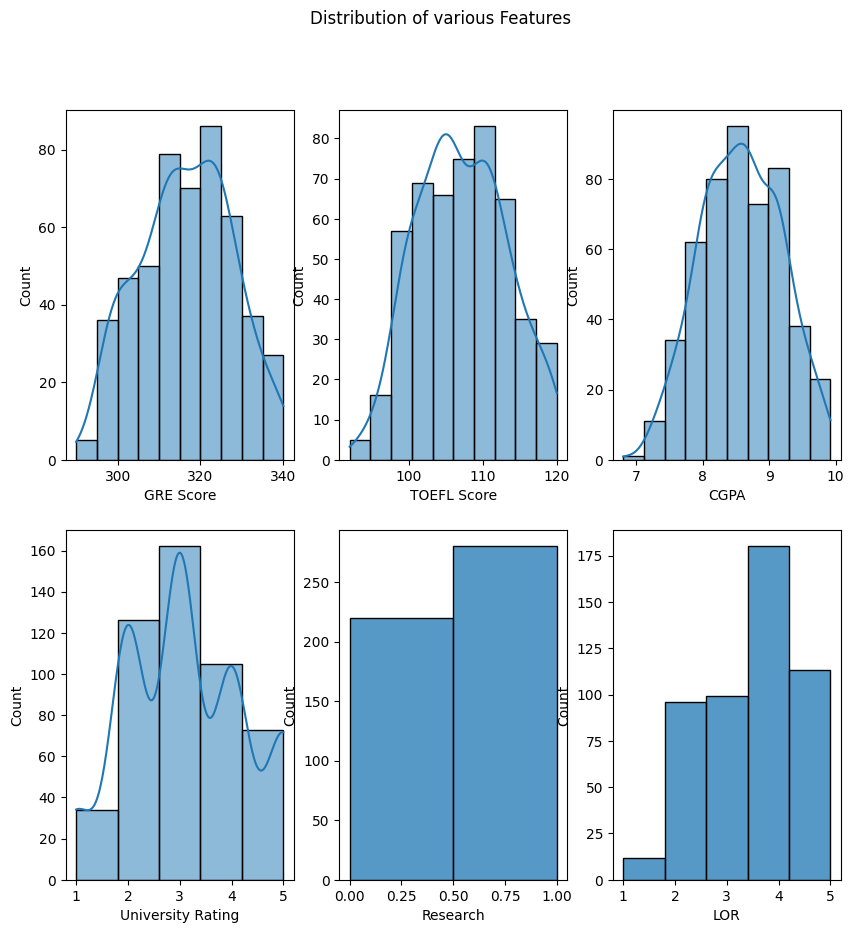

In [102]:
fig = plt.figure(figsize=(10,10))

plt.subplot(2, 3, 1)
sns.histplot(df['GRE Score'], kde=True, bins=10)

plt.subplot(2, 3, 2)
sns.histplot(df['TOEFL Score'], kde=True, bins=10)

plt.subplot(2, 3, 3)
sns.histplot(df['CGPA'], kde=True, bins=10)

plt.subplot(2, 3, 4)
sns.histplot(df['University Rating'], kde=True, bins=5)

plt.subplot(2, 3, 5)
sns.histplot(df['Research'], bins=2)

plt.subplot(2, 3, 6)
sns.histplot(df['LOR'], bins=5)


fig.suptitle('Distribution of various Features')


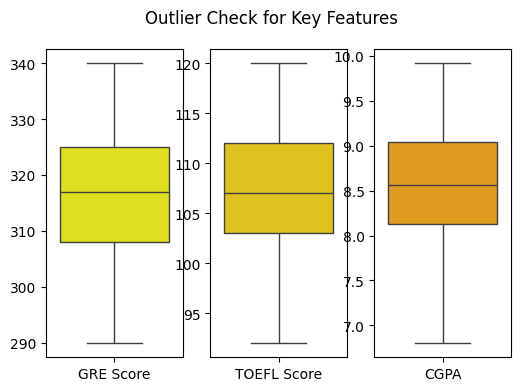

In [103]:

fig = plt.figure(figsize=(6,4))

plt.subplot(1, 3, 1)
sns.boxplot(data=df[['GRE Score']], color='yellow')
plt.subplot(1, 3, 2)
sns.boxplot(data=df[['TOEFL Score']], color='gold')
plt.subplot(1, 3, 3)
sns.boxplot(data=df[['CGPA']], color='orange')

fig.suptitle('Outlier Check for Key Features')
plt.show()

GRE Score:
- Range: 290 to 340.
- Median: 317.
- Distribution is symmetric.
- No visible outliers – values lie well within the whiskers.

TOEFL Score:
- Range: 88 to 120.
- Median: 107.
- Slightly left-skewed distribution.
- No significant outliers detected.

CGPA:
- Range: 6.8 to 10.
- Median: 8.6.
- Some minor spread in the lower end, but again, no strong outliers.

# **Conclusion:**
All three features show a reasonable and natural distribution without extreme outliers. Thus, no need for outlier treatment.

In [104]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

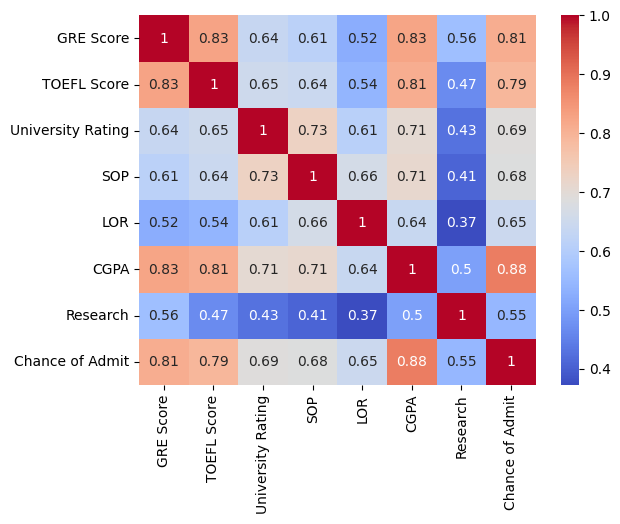

In [105]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

# **Observations**
- No negative corelation exist between the features
- CGPA has the highest correlation (0.88) with Chance of Admit:
 - Indicates strong predictive power.

- GRE and TOEFL scores also show high correlation (0.81 and 0.79)
- Research has moderate correlation (0.55).
- SOP, LOR, University Rating have moderate correlation (~0.65–0.69).

- High inter-correlation among GRE, TOEFL, CGPA:
  - GRE–TOEFL (0.83), GRE–CGPA (0.83), TOEFL–CGPA (0.81)
  - Indicates multicollinearity concern.



<Axes: xlabel='GRE Score', ylabel='TOEFL Score'>

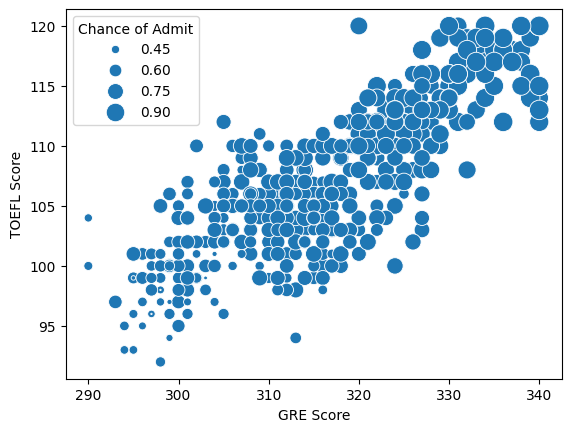

In [106]:
sns.scatterplot(x='GRE Score', y='TOEFL Score', size='Chance of Admit', sizes=(1,200), data=df)

*   Both GRE and TOEFL scores are strong predictors of admission chances — as also indicated in the correlation matrix earlier.
*   There's a clear positive relationship between GRE and TOEFL scores. As GRE scores increase, TOEFL scores also tend to increase.
*   Larger bubbles (i.e., higher Chance of Admit) tend to cluster in the top-right quadrant, where both GRE and TOEFL scores are high. This suggests that candidates with high GRE and TOEFL scores have a higher probability of admission.
*   The bottom-left corner (low GRE and TOEFL) contains smaller bubbles, indicating lower chances of admission for candidates with weak scores.

<Axes: xlabel='CGPA', ylabel='Chance of Admit'>

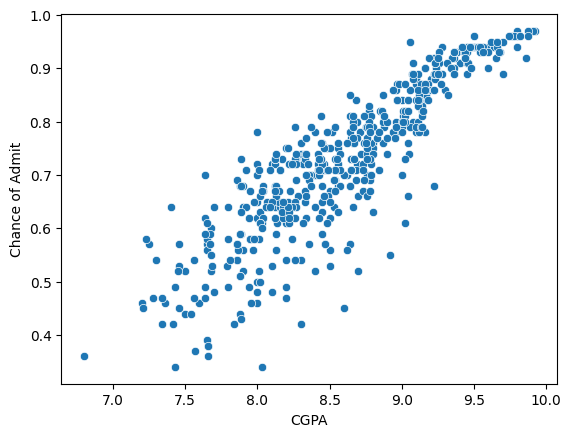

In [107]:
sns.scatterplot(x='CGPA', y='Chance of Admit', data=df)

*   Strong Positive Linear Correlation between CGPA and Chance of Admit. As CGPA increases, the Chance of Admit also increases sharply. The data points form an upward trend, suggesting a strong linear relationship.
*   For CGPA between 7.5 to 8.5, the chance of admit varies widely from 0.4 to 0.9. This suggests that other features (GRE, TOEFL, SOP, etc.) influence decisions in this range.
*   CGPA is among the strongest predictor of admission chances.

<Axes: xlabel='University Rating', ylabel='Chance of Admit'>

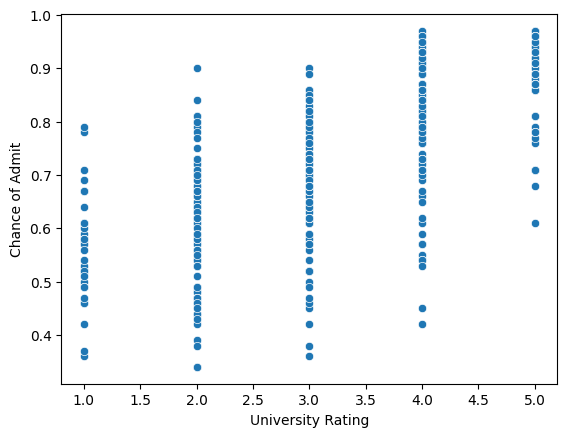

In [108]:
sns.scatterplot(x='University Rating', y='Chance of Admit', data=df)

- As the University Rating increases from 1 to 5, the Chance of Admit also tends to increase slightly. However, the correlation is not very strong or linear, as visible from the vertical dispersion of points at each rating level.

- For each rating, the chance of admit spans a wide range (from 0.35 to 0.95).This suggests University Rating alone is not a strong predictor.

<Axes: xlabel='SOP', ylabel='Chance of Admit'>

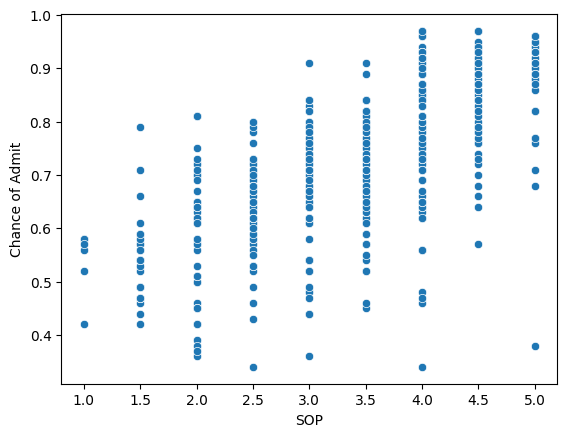

In [109]:
sns.scatterplot(x='SOP', y='Chance of Admit', data=df)

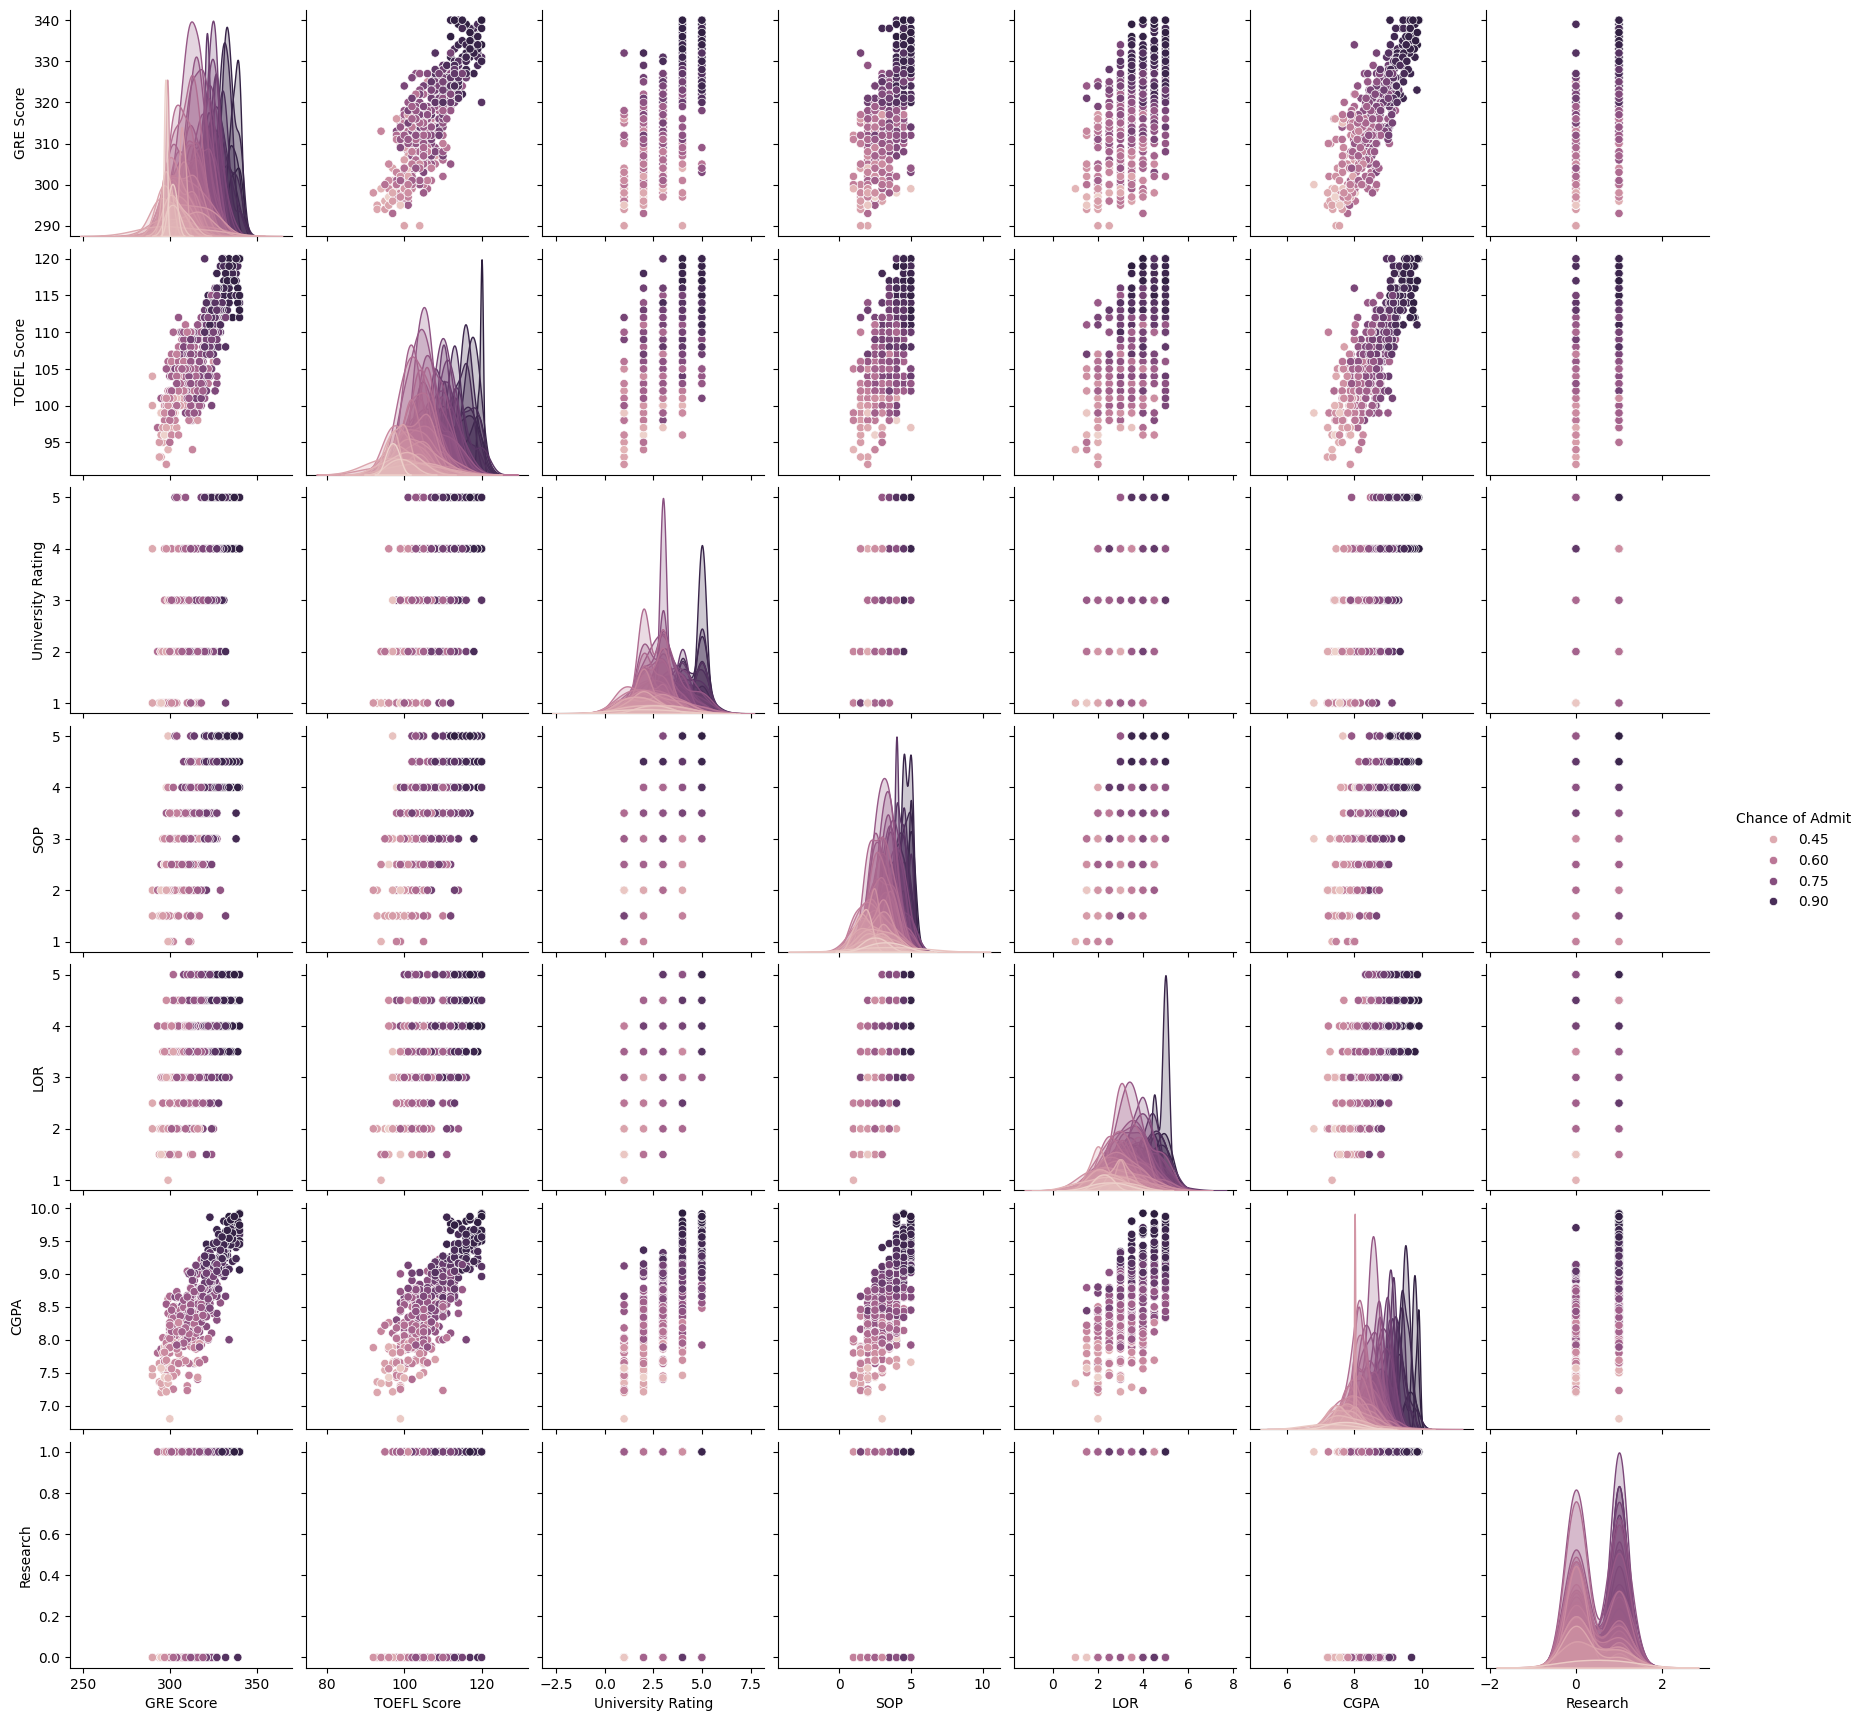

In [111]:
sns.pairplot(data=df, hue='Chance of Admit')

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Step 1: Drop the target column (Chance of Admit)
X = df.drop(columns='Chance of Admit')

# Step 2: Add a constant column for VIF calculation
X_const = add_constant(X)

# Step 3: Calculate VIF
vif_df = pd.DataFrame()
vif_df["feature"] = X_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_df)


             feature          VIF
0              const  1511.495830
1          GRE Score     4.464249
2        TOEFL Score     3.904213
3  University Rating     2.621036
4                SOP     2.835210
5                LOR     2.033555
6               CGPA     4.777992
7           Research     1.494008


# ⚓ **VIF analysis shows that all features have VIF < 5, which means no multicollinearity issue among all the featyre variables.**

# **⏬ Splitting the data into training and testing sets ⏬**

In [113]:
from sklearn.model_selection import train_test_split


# Seprating the Feature and Target variables
X = df.drop(columns='Chance of Admit')
y = df['Chance of Admit']

# Spliting the test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X.shape, X_train.shape, X_test.shape)

(500, 7) (400, 7) (100, 7)


# **Using 80 % of data for training the model and rest 20 % for testing**

In [114]:
# Standardizing the data after splitting
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train )

LinearRegression()

In [116]:
# Coefficients and Intercept
print("Intercept:", lr.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, lr.coef_):
    print(f"{feature}: {coef:.4f}")


Intercept: 0.7241749999999999
Coefficients:
GRE Score: 0.0267
TOEFL Score: 0.0182
University Rating: 0.0029
SOP: 0.0018
LOR: 0.0159
CGPA: 0.0676
Research: 0.0119


In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict
y_pred = lr.predict(X_test_scaled)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Adjusted R-squared
n = X_test.shape[0]
k = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

print(f"\nModel Evaluation Metrics:")
print('-------------------------')
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")
print('-------------------------')



Model Evaluation Metrics:
-------------------------
MAE: 0.0427
RMSE: 0.0609
R² Score: 0.8188
Adjusted R²: 0.8051
-------------------------


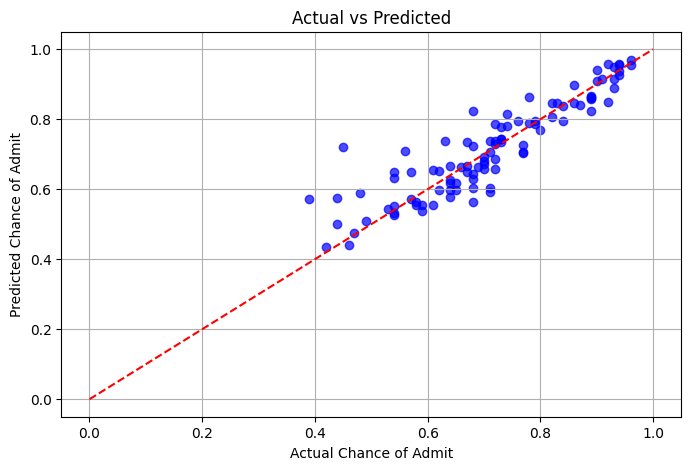

In [118]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


# **Actual vs predicted plot distribution near the diagonal is showing good fit**

In [119]:
residuals = y_test - y_pred
print("Mean of residuals:", residuals.mean())


Mean of residuals: -0.005453623717661251


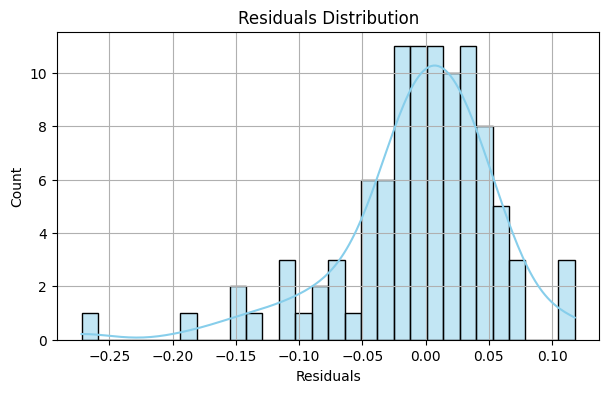

In [120]:
plt.figure(figsize=(7,4))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.grid(True)
plt.show()

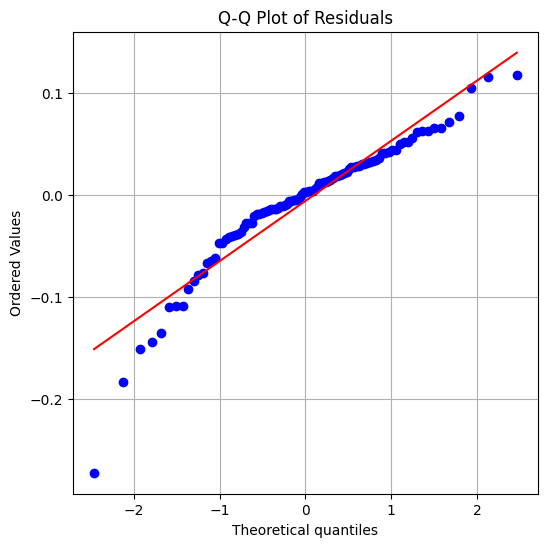

In [121]:
import scipy.stats as stats

plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()

# **Residual histogram and Q-Q plot shows normal distribution**

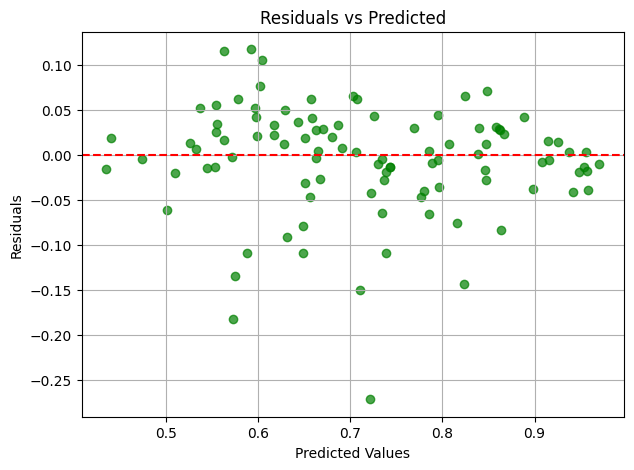

In [122]:
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.7, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()

**Residuals vs Predicted plot shows fairly random scatter which is good as No funnel shape or clear pattern is observed**

In [123]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

gq_test = het_goldfeldquandt(residuals, X_test_scaled)
print("Goldfeld-Quandt Test p-value:", gq_test[1])

Goldfeld-Quandt Test p-value: 0.9888496246613846


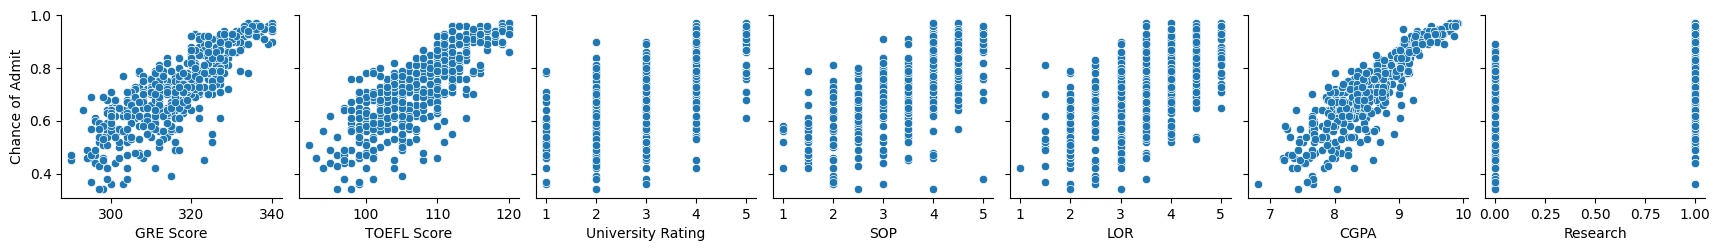

In [124]:
sns.pairplot(df, y_vars='Chance of Admit', x_vars=X.columns)

### Business Case Summary – Jamboree Admission Predictor

We developed a linear regression model to predict a student’s probability of admission to top universities based on GRE, TOEFL, CGPA, SOP, LOR, and research experience.

**Model Evaluation Results:**
- MAE: 0.0427
- RMSE: 0.0609
- R²: 0.8188
- Adjusted R²: 0.8051

**Key Insights:**
- CGPA is the strongest predictor of admission.
- GRE and TOEFL scores are also significantly important.
- SOP and LOR show moderate impact.
- Research experience slightly increases the chances of admission.

**Model Diagnostics:**
- Residuals are normally distributed (checked via Q-Q plot).
- Mean of residuals is close to zero.
- Goldfeld-Quandt test confirms no heteroscedasticity.
- No multicollinearity (all VIFs < 5)

The model is statistically sound and reliable for prediction.

-------------------------------------------------
# **Business Recommendations for Jamboree:**
--------------------------------------------------


*The model predicts admission chances with 81.8% accuracy (R²). CGPA, GRE, and TOEFL scores are critical features. Jamboree can integrate this tool into student counseling services.*


- Use the model to create an "Admission Probability Calculator" on their website.

- Offer personalized coaching for students with low predicted scores.